# Crypto-Currency Prediction System
In this project, I will leveraging the power of Keras and TensorFlow, to employ advanced machine learning techniques, particularly deep learning, to develop a robust predictive model for cryptocurrency prices, aiming to provide valuable insights and enhance decision-making in the dynamic and volatile cryptocurrency market.

## Business Understanding
In the rapidly evolving landscape of digital assets, accurate prediction of cryptocurrency prices holds immense significance for investors, traders, and financial institutions. Cryptocurrency markets are known for their volatility, influenced by a myriad of factors such as market sentiment, global economic indicators, and technological developments within the blockchain space. 

The ability to forecast price movements enables stakeholders to make informed decisions, optimize trading strategies, and manage risk effectively. This project's, main goal is to leverage machine learning techniques, specifically deep learning, to develop a predictive model for cryptocurrency prices. By understanding and interpreting the underlying patterns in historical price data, my aim is to provide valuable insights that contribute to more informed decision-making in the world of cryptocurrency trading.

## Problem Statement
As the cryptocurrency market continues to experience unprecedented volatility, there is an increasing demand for accurate and timely predictions of digital asset prices. Existing approaches often fall short in capturing the intricate patterns and nonlinear relationships within the market, hindering the ability of investors and traders to make informed decisions. My project addresses this challenge by utilizing Keras and TensorFlow, to develop a reliable cryptocurrency price prediction model. 

The goal is to create a solution that not only enhances my understanding of market dynamics but also empowers stakeholders with actionable insights, ultimately contributing to more effective decision-making in the fast-paced and ever-changing cryptocurrency landscape

### Objectives

#### 1. Main Objective:
   - To develop a robust cryptocurrency price prediction model:**
     - Implement a machine learning model using Keras and TensorFlow that accurately predicts cryptocurrency prices.
     - Focus on capturing complex patterns and trends within the market to enhance the model's predictive power.

#### 2. Secondary Objectives:

   - **To evaluate model performance and generalization:**
     - Assess the performance of the developed model on historical data not used during training (validation set).
     - Employ appropriate evaluation metrics, such as mean absolute error (MAE) or root mean square error (RMSE), to measure the model's accuracy.

   - **To explore feature importance and insights:**
     - Analyze the importance of different features in the model's predictions.
     - Gain insights into the factors driving cryptocurrency price movements, potentially identifying key indicators for future predictions.

#### 3. To explore and identify the most volatile cryptocurrency:
**Identify the Most Volatile Cryptocurrency:**
  - Analyze price volatility over time to identify the cryptocurrency exhibiting the highest degree of price fluctuations.


## Data Understanding
There are two sets of data, `archive.zip` and `daily.zip`. The former contains daily price movements of six popular cryptocurrencies namely; Bitcoin (BTC), Ethereum (ETH), Ripple (XRP), and Litecoin (LTC) from January 1, 2018, to May 31, 2023. 

Columns:
* **Crypto**: This column specifies the name of the cryptocurrency (e.g., BTC, ETH, XRP, LTC).
* **Date**: The date on which the price data was recorded.
* **Open**: The opening price of the cryptocurrency at the beginning of the day.
* **High**: The highest price reached by the cryptocurrency during the day.
* **Low**: The lowest price reached by the cryptocurrency during the day.
* **Close**: The closing price of the cryptocurrency at the end of the day.

`Daily.zip` also contains one csv file for each of the top 50 crypto coins by Market Capitalization from January 1, 2015, to January 21, 2024. 

Columns:
* **date** : date of observation - the price is taken at 00:00:00 hours
* **price** : Price at the given date and time
* **total_volume** : volume of transactions on the given day
* **market_cap** : Market capitalization in USD

**Acknowledgements**

`Daily.zip` is taken from CoinGecko API and so please check with their terms of usage for using it in your projects.

And also Both these files were sourced from kaggle.





With a bit of an introduction to our datasets, we'll now import the libraries we'll be using in this study.

In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [75]:
#lets load our datasets
combine = pd.read_csv('./data/crypto_combine.csv')
btc = pd.read_csv('./data/BTC.csv')
eth = pd.read_csv('./data/ETH.csv')

In [76]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crypto  7899 non-null   object 
 1   Date    7899 non-null   object 
 2   Open    7899 non-null   float64
 3   High    7899 non-null   float64
 4   Low     7899 non-null   float64
 5   Close   7899 non-null   float64
dtypes: float64(4), object(2)
memory usage: 370.4+ KB


In [77]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crypto  1974 non-null   object 
 1   Date    1974 non-null   object 
 2   Open    1974 non-null   float64
 3   High    1974 non-null   float64
 4   Low     1974 non-null   float64
 5   Close   1974 non-null   float64
dtypes: float64(4), object(2)
memory usage: 92.7+ KB


We'll continue with crypto-combine.csv because it seems that it contains the rest of the data from individual files.

In [78]:
combine.shape

(7899, 6)

In [79]:
combine['Crypto'].unique()

array(['BTC', 'ETH', 'LTC', 'XRP'], dtype=object)

In [80]:
#convert date column
combine['Date'] = pd.to_datetime(combine['Date'])
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Crypto  7899 non-null   object        
 1   Date    7899 non-null   datetime64[ns]
 2   Open    7899 non-null   float64       
 3   High    7899 non-null   float64       
 4   Low     7899 non-null   float64       
 5   Close   7899 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 370.4+ KB


In [81]:
combine.set_index('Date', inplace=True)
combine.head()

,Crypto,Open,High,Low,Close
Date,,,,,
2019-12-31,BTC,7254.0,7309.0,7132.0,7171.0
2019-12-30,BTC,7402.0,7430.0,7217.0,7254.0
2019-12-29,BTC,7334.0,7529.0,7295.0,7402.0
2019-12-28,BTC,7235.0,7359.0,7235.0,7334.0
2019-12-27,BTC,7208.0,7267.0,7087.0,7235.0


The data doesn't seem to contain any null-values, now lets check for some duplicate entries.

In [82]:
combine.duplicated().value_counts()

False    7206
True      693
dtype: int64

It seems we have some duplicate entries.

In [83]:
# Display the duplicate rows
duplicate_rows = combine[combine.duplicated()]
duplicate_rows.head()


,Crypto,Open,High,Low,Close
Date,,,,,
2019-05-10,BTC,6132.00,6455.00,6131.00,6325.00
2019-05-10,ETH,168.03,176.24,167.62,171.62
2019-05-10,LTC,72.98,79.16,72.44,76.83
2022-12-23,XRP,0.35,0.35,0.35,0.35
2022-12-22,XRP,0.35,0.35,0.34,0.35


In [84]:
# Display both the original and duplicate rows
all_duplicates = combine[combine.duplicated(keep=False)]
all_duplicates.head()


,Crypto,Open,High,Low,Close
Date,,,,,
2019-05-11,BTC,6132.00,6455.00,6131.00,6325.00
2019-05-10,BTC,6132.00,6455.00,6131.00,6325.00
2019-05-11,ETH,168.03,176.24,167.62,171.62
2019-05-10,ETH,168.03,176.24,167.62,171.62
2019-05-11,LTC,72.98,79.16,72.44,76.83


Despite the fact that the dates on these entries are different, the values are the same, so now we drop these duplicates.

In [85]:
df = combine.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7206 entries, 2019-12-31 to 2019-01-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crypto  7206 non-null   object 
 1   Open    7206 non-null   float64
 2   High    7206 non-null   float64
 3   Low     7206 non-null   float64
 4   Close   7206 non-null   float64
dtypes: float64(4), object(1)
memory usage: 337.8+ KB


We've cleaned our data now onto some EDA

## Exploratory Data Analysis

We'll kick things off with a basic time series plot to visualize the historic price trends of each coin.

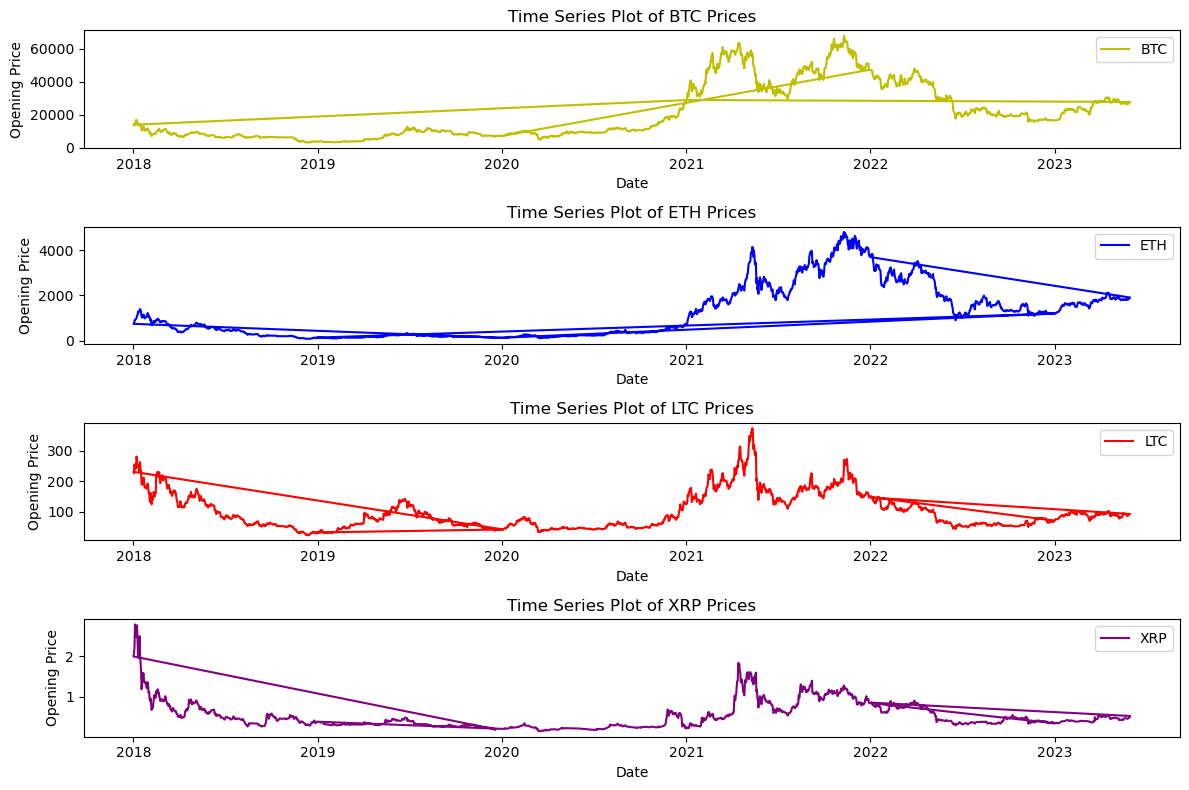

In [86]:
# Time Series Plot for each coin's opening price
colors = ['y', 'b', 'r', 'purple']

plt.figure(figsize=(12, 8))
for i, (crypto, color) in enumerate(zip(df['Crypto'].unique(), colors), 1):
    plt.subplot(len(df['Crypto'].unique()), 1, i)
    plt.plot(df[df['Crypto'] == crypto].index, df[df['Crypto'] == crypto]['Open'], label=crypto, color=color)
    plt.title(f'Time Series Plot of {crypto} Prices')
    plt.xlabel('Date')
    plt.ylabel('Opening Price')
    plt.legend()
    plt.tight_layout()

plt.show()

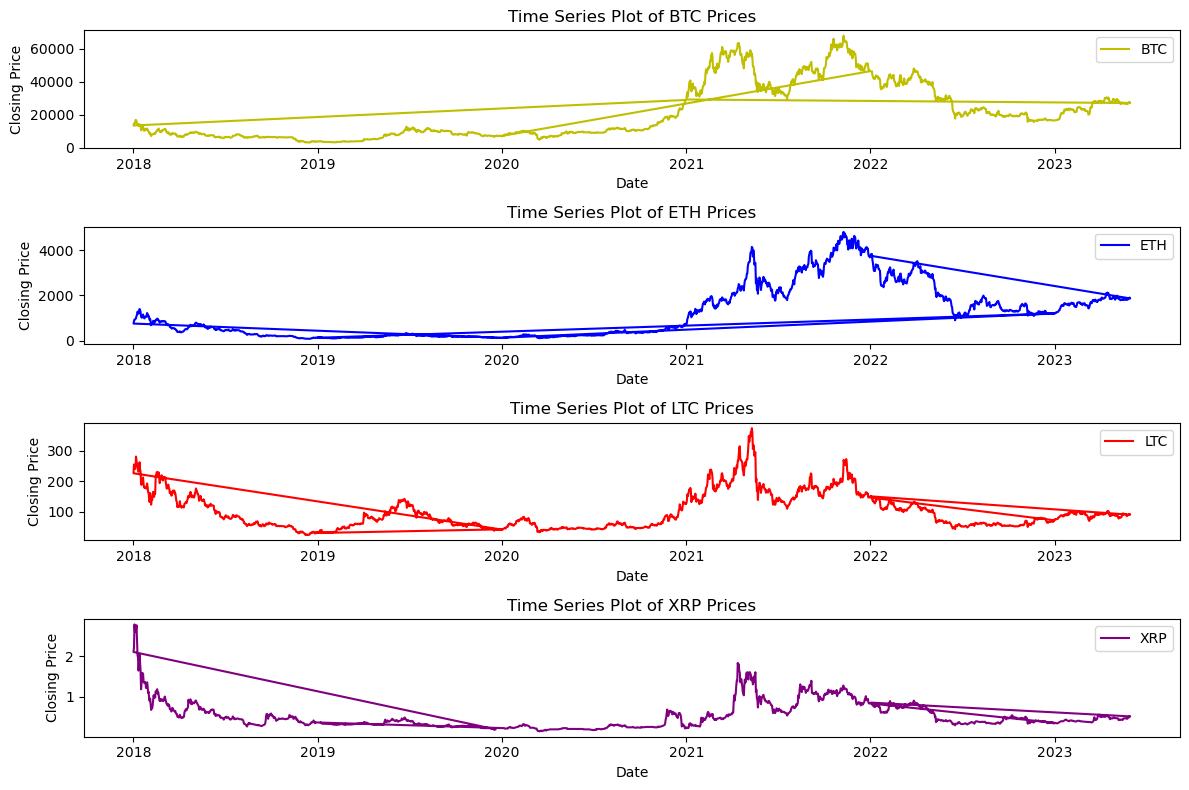

In [87]:
plt.figure(figsize=(12, 8))
for i, (crypto, color) in enumerate(zip(df['Crypto'].unique(), colors), 1):
    plt.subplot(len(df['Crypto'].unique()), 1, i)
    plt.plot(df[df['Crypto'] == crypto].index, df[df['Crypto'] == crypto]['Close'], label=crypto, color=color)
    plt.title(f'Time Series Plot of {crypto} Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.tight_layout()

plt.show()

<Figure size 1200x800 with 0 Axes>

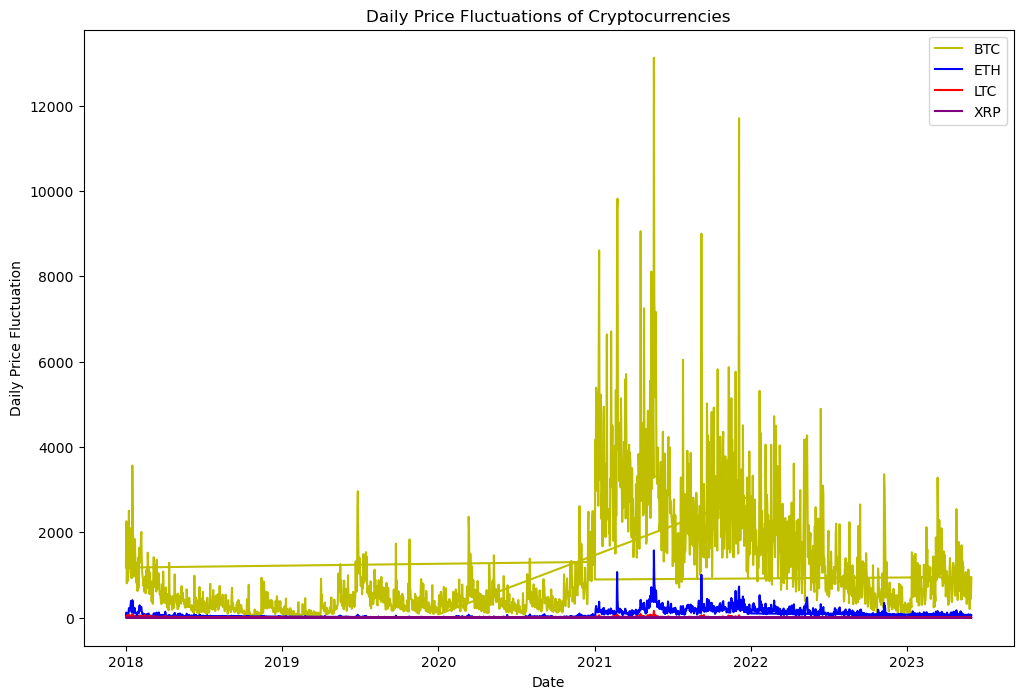

In [89]:
plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))
for crypto, color in zip(df['Crypto'].unique(), colors):
    # Calculate daily fluctuation on-the-fly
    df_subset = df[df['Crypto'] == crypto]
    daily_fluctuation = df_subset['High'] - df_subset['Low']
    
    plt.plot(df_subset.index, daily_fluctuation, label=crypto, color=color)

plt.title('Daily Price Fluctuations of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Daily Price Fluctuation')
plt.legend()
plt.show()

In [73]:
df.head()

,Crypto,Open,High,Low,Close,daily_fluctuation
Date,,,,,,
2019-12-31,BTC,7254.0,7309.0,7132.0,7171.0,177.0
2019-12-30,BTC,7402.0,7430.0,7217.0,7254.0,213.0
2019-12-29,BTC,7334.0,7529.0,7295.0,7402.0,234.0
2019-12-28,BTC,7235.0,7359.0,7235.0,7334.0,124.0
2019-12-27,BTC,7208.0,7267.0,7087.0,7235.0,180.0


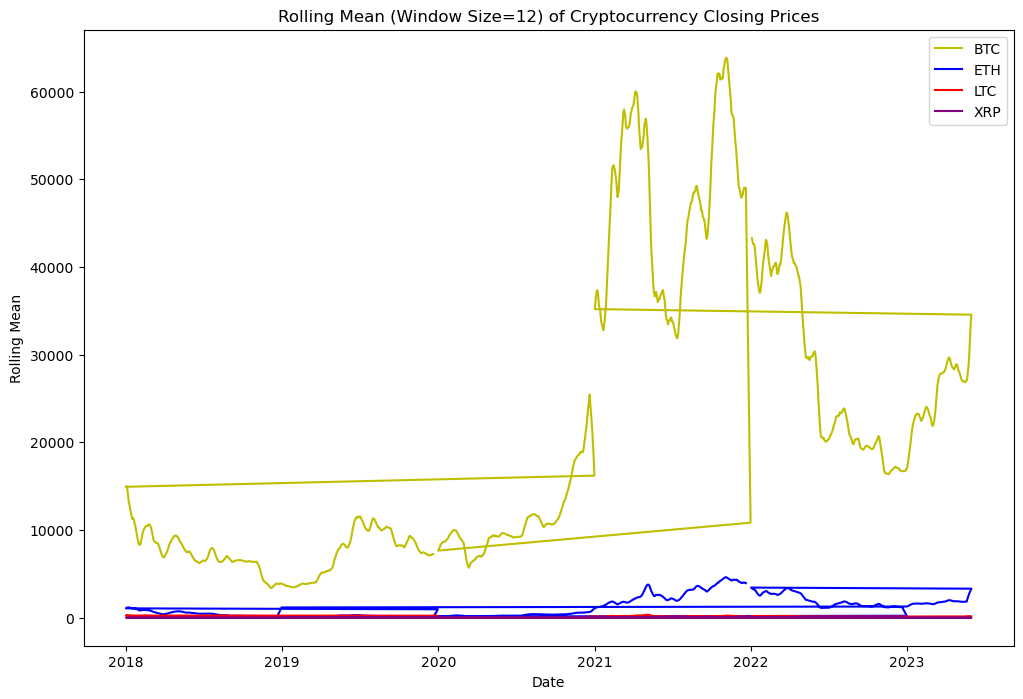

In [62]:
window_size = 12  # Adjust the window size as needed
plt.figure(figsize=(12, 8))
for crypto, color in zip(df['Crypto'].unique(), colors):
    plt.plot(df[df['Crypto'] == crypto].index, df[df['Crypto'] == crypto]['Close'].rolling(window=window_size).mean(), label=crypto, color=color)
plt.title(f'Rolling Mean (Window Size={window_size}) of Cryptocurrency Closing Prices')
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.legend()
plt.show()

In [64]:
#lets check for stationarity using dickey-fuller test
dfuller = adfuller(df)

dfoutput = pd.Series(dfuller[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

print(dfoutput)